## CREDIT RISK ANALYSIS AND MODEL


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 8
plt.style.use("seaborn")


In [2]:
import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

## Load Dataset

In [3]:
bankloans = pd.read_csv("Data_credit.csv")
bankloans.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [4]:
bankloans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       850 non-null    int64  
 1   ed        850 non-null    int64  
 2   employ    850 non-null    int64  
 3   address   850 non-null    int64  
 4   income    850 non-null    int64  
 5   debtinc   850 non-null    float64
 6   creddebt  850 non-null    float64
 7   othdebt   850 non-null    float64
 8   default   700 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 59.9 KB


In [5]:
bankloans.isnull().value_counts()

age    ed     employ  address  income  debtinc  creddebt  othdebt  default
False  False  False   False    False   False    False     False    False      700
                                                                   True       150
dtype: int64

In [6]:
bankloans.isnull().sum()

age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default     150
dtype: int64

In [7]:
numeric_var_names = [key for key in dict(bankloans.dtypes) 
                     if dict(bankloans.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
categorical_var_names = [key for key in dict(bankloans.dtypes) 
                        if dict(bankloans.dtypes)[key] in ['object']]

In [8]:
numeric_var_names

['age',
 'ed',
 'employ',
 'address',
 'income',
 'debtinc',
 'creddebt',
 'othdebt',
 'default']

In [9]:
categorical_var_names

[]

## spliting the dataSet in two part:
1:currently existing customer
2:new customer

In [10]:
bankloans_existing = bankloans.loc[bankloans.default.isnull() == 0]
bankloans_new = bankloans.loc[bankloans.default.isnull() == 1]

In [11]:
bankloans['default'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
845     True
846     True
847     True
848     True
849     True
Name: default, Length: 850, dtype: bool

In [12]:
bankloans.describe()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000
mean,35.029412,1.710588,8.565882,8.371765,46.675294,10.171647,1.576805,3.078789,0.261429
std,8.041432,0.927784,6.777884,6.895016,38.543054,6.719441,2.125840,3.398803,0.439727
min,20.000000,1.000000,0.000000,0.000000,13.000000,0.100000,0.011696,0.045584,0.000000
25%,29.000000,1.000000,3.000000,3.000000,24.000000,5.100000,0.382176,1.045942,0.000000
50%,34.000000,1.000000,7.000000,7.000000,35.000000,8.700000,0.885091,2.003243,0.000000
75%,41.000000,2.000000,13.000000,12.000000,55.750000,13.800000,1.898440,3.903001,1.000000
max,56.000000,5.000000,33.000000,34.000000,446.000000,41.300000,20.561310,35.197500,1.000000


Text(0.5, 1.0, ' Age: Box plot')

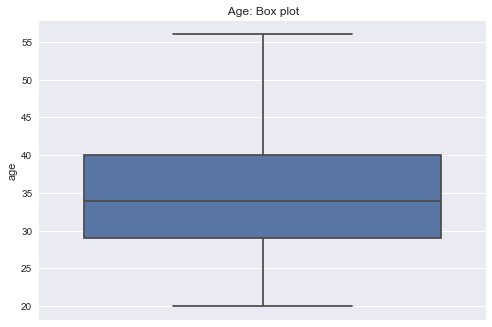

In [13]:
sns.boxplot(y= 'age',data= bankloans_existing)
plt.title(" Age: Box plot")

In [14]:
bankloans.ed

0      3
1      1
2      1
3      1
4      2
      ..
845    1
846    2
847    1
848    2
849    1
Name: ed, Length: 850, dtype: int64

Text(0.5, 1.0, 'Employ: Box plot')

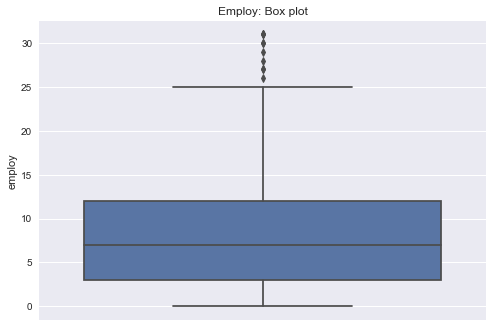

In [15]:
## employ: Tenure of current employer
sns.boxplot(y='employ',data= bankloans_existing)
plt.title("Employ: Box plot")

Text(0.5, 1.0, 'income of employee: box plot')

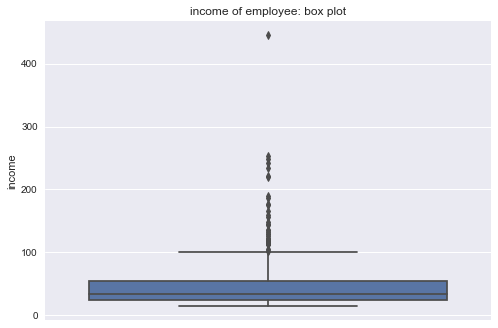

In [16]:
sns.boxplot(y = 'income',data=bankloans_existing)
plt.title("income of employee: box plot")


Text(0.5, 1.0, 'debt to income ratio: box plot')

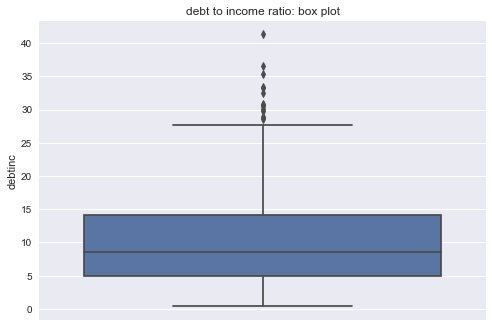

In [17]:
sns.boxplot(y='debtinc', data= bankloans_existing)
plt.title("debt to income ratio: box plot")

Text(0.5, 1.0, 'credit to dept ratio: box plot')

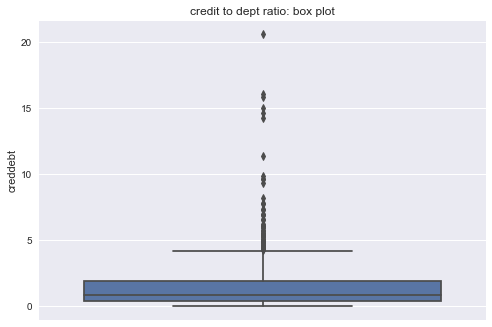

In [18]:
sns.boxplot(y='creddebt', data= bankloans_existing)
plt.title("credit to dept ratio: box plot")

Text(0.5, 1.0, 'other debt  : box plot')

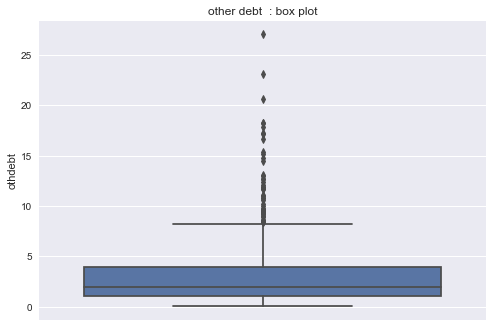

In [19]:
sns.boxplot(y='othdebt', data= bankloans_existing)
plt.title("other debt  : box plot")

In [20]:
income_minlimit = bankloans_existing["income"].quantile(0.75) + 1.5 * (bankloans_existing["income"].quantile(0.75) - bankloans_existing["income"].quantile(0.25))
income_minlimit

101.5

In [21]:
# def outlier_caping(x):
#     bankloans_existing['x'] = bankloans_existing['x'].clip_upper(x.quantile(.95))
#     return x

In [22]:
# outlier_caping(age)
# # bankloans_existing.age.quantile(.95)


In [23]:
# sns.boxplot(y = 'income',data=bankloans_existing)
# plt.title("income of employee: box plot")


In [24]:
# bankloans_existing = bankloans_existing.apply(lambda x: outlier_caping(x))



In [25]:
# def outlier_capping(x):
#     """A funtion to remove and replace the outliers for numerical columns"""
#     x = x.clip_upper(x.quantile(0.95))
    
#     return(x)

In [26]:
#outlier treatment
# bankloans_existing = bankloans_existing.apply(lambda x: outlier_capping(x))


In [27]:
bankloans_existing.corr()


,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
age,1.000000,0.022325,0.536497,0.597591,0.478710,0.016398,0.295207,0.340217,-0.137657
ed,0.022325,1.000000,-0.153621,0.056919,0.235190,0.008838,0.088274,0.165459,0.114676
employ,0.536497,-0.153621,1.000000,0.322334,0.619681,-0.031182,0.403694,0.406091,-0.282978
address,0.597591,0.056919,0.322334,1.000000,0.316245,0.011323,0.208435,0.226514,-0.164451
income,0.478710,0.235190,0.619681,0.316245,1.000000,-0.026777,0.570199,0.610659,-0.070970
debtinc,0.016398,0.008838,-0.031182,0.011323,-0.026777,1.000000,0.501767,0.584870,0.389575
creddebt,0.295207,0.088274,0.403694,0.208435,0.570199,0.501767,1.000000,0.633104,0.244740
othdebt,0.340217,0.165459,0.406091,0.226514,0.610659,0.584870,0.633104,1.000000,0.145713
default,-0.137657,0.114676,-0.282978,-0.164451,-0.070970,0.389575,0.244740,0.145713,1.000000


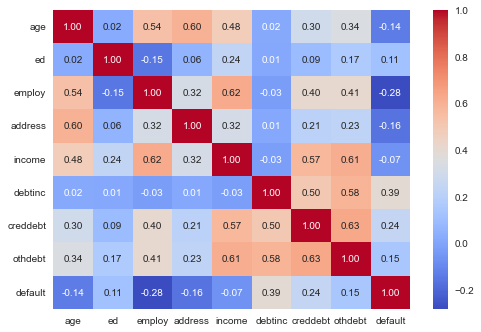

In [28]:
sns.heatmap(bankloans_existing.corr(),annot=True,fmt="0.2f",cmap="coolwarm")
plt.show()



In [29]:
bankloans_existing.shape

(700, 9)

In [30]:
bankloans_new.shape

(150, 9)

In [31]:
bankloans_existing['default'].value_counts()

0.0    517
1.0    183
Name: default, dtype: int64

Text(0.5, 1.0, 'Distribution of default')

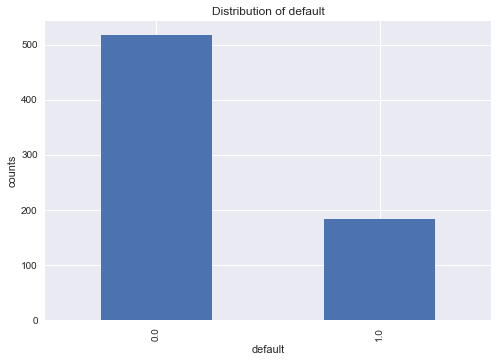

In [32]:
# bankloans_existing['default'].value_counts().plot.bar()
# plt.xlabel("default")
# plt.ylabel("count")
# plt.title("Distribution of default")
bankloans_existing['default'].value_counts().plot.bar()
plt.xlabel('default')
plt.ylabel('counts')
plt.title('Distribution of default')


In [33]:
## determine how much of zeros and ones in percent
round(bankloans_existing['default'].value_counts()/bankloans_existing.shape[0]*100)

0.0    74.0
1.0    26.0
Name: default, dtype: float64

In [34]:
## Exploratory Data  Analysis
tstats_df = pd.DataFrame()

for eachvariable in numeric_var_names:
    tstats = stats.ttest_ind(bankloans_existing.loc[bankloans_existing["default"] == 1,eachvariable],bankloans_existing.loc[bankloans_existing["default"] == 0, eachvariable],equal_var=False)
    temp = pd.DataFrame([eachvariable, tstats[0], tstats[1]]).T
    temp.columns = ['Variable Name', 'T-Statistic', 'P-Value']
    tstats_df = pd.concat([tstats_df, temp], axis=0, ignore_index=True)
    
tstats_df =  tstats_df.sort_values(by = "P-Value").reset_index(drop = True)


In [35]:
tstats_df

,Variable Name,T-Statistic,P-Value
0,default,inf,0.0
1,debtinc,9.536633,0.0
2,employ,-8.505217,0.0
3,address,-4.767369,0.000003
4,creddebt,4.770607,0.000003
5,age,-3.50106,0.000535
6,othdebt,3.217296,0.001472
7,ed,2.945596,0.003475
8,income,-1.68573,0.093014


In [36]:
def BivariateAnalysisPlot(segment_by):
#     features vs target box plot
    fig, ax = plt.subplots(ncols=1,figsize = (10,8))
    sns.boxplot(x = 'default', y = segment_by, data=bankloans_existing)
    plt.title("Box plot of "+segment_by)
    

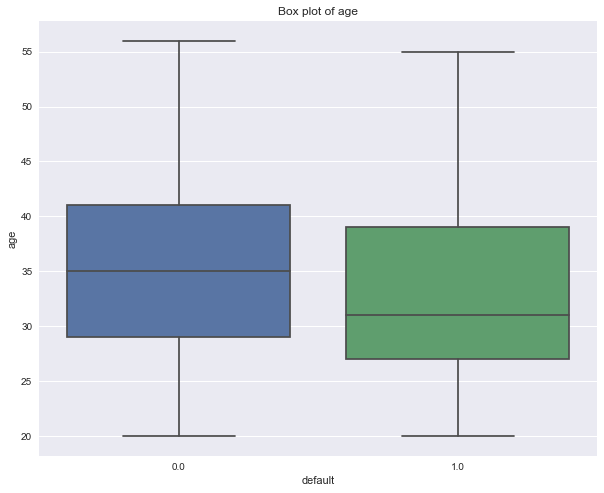

In [37]:
BivariateAnalysisPlot('age')


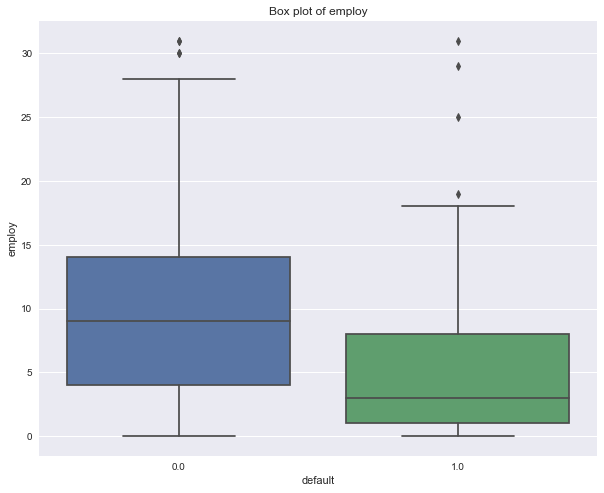

In [38]:
BivariateAnalysisPlot('employ')


In [40]:
# employ	address	income	debtinc	creddebt	othdebt	defaul

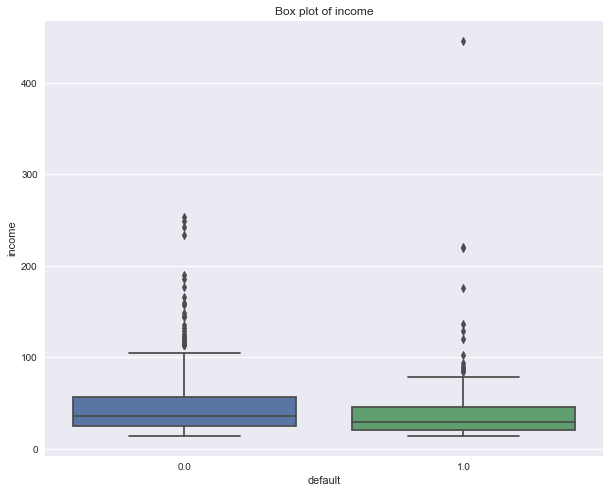

In [41]:
BivariateAnalysisPlot('income')

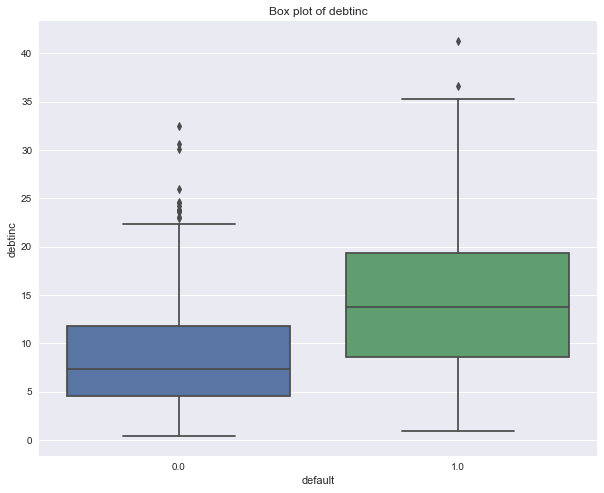

In [42]:
BivariateAnalysisPlot('debtinc')

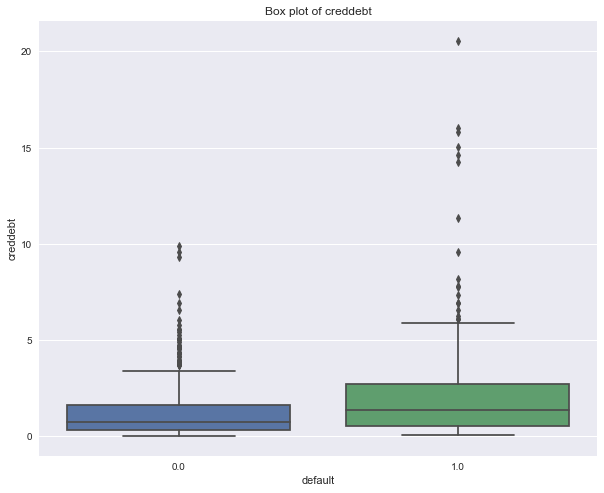

In [43]:
BivariateAnalysisPlot('creddebt')

In [44]:
## Model building 
## 1.Logistic regression model 
## 2.Decision tree

In [84]:
 featurecolumns = bankloans_existing.columns.difference(['default'])
# featurecolumns
# features = bankloans_existing.drop('default',axis=1)
# target = bankloans_existing['default']
# features.isnull()


,age,ed,employ,address,income,debtinc,creddebt,othdebt
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
695,False,False,False,False,False,False,False,False
696,False,False,False,False,False,False,False,False
697,False,False,False,False,False,False,False,False
698,False,False,False,False,False,False,False,False


In [96]:
x_train,x_test,y_train ,y_test = train_test_split(bankloans_existing[featurecolumns],
                                                 bankloans_existing['default'], stratify = bankloans_existing['default'], test_size = 0.2, random_state=123)

In [97]:
x_train.shape

(560, 8)

In [98]:
x_test.shape

(140, 8)

In [99]:
## To check stratify sampling 
round(y_train.value_counts()/y_train.shape[0]*100)

0.0    74.0
1.0    26.0
Name: default, dtype: float64

In [100]:
round(y_test.value_counts()/y_test.shape[0]*100)

0.0    74.0
1.0    26.0
Name: default, dtype: float64

In [101]:
log_regg= LogisticRegression()
log_regg.fit(x_train,y_train)
y_pred = log_regg.predict(x_test)


C:\python3.10\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [102]:
bankloans_test_predict_log = pd.DataFrame({'actual':y_test,'predicted_value':y_pred})
bankloans_test_predict_log= bankloans_test_predict_log.reset_index()
bankloans_test_predict_log

,index,actual,predicted_value
0,145,0.0,0.0
1,526,0.0,0.0
2,689,0.0,0.0
3,430,1.0,1.0
4,245,0.0,0.0
...,...,...,...
135,64,0.0,0.0
136,141,1.0,0.0
137,130,0.0,0.0
138,39,0.0,0.0


In [103]:
## create confusion matrices
cm_logregg = metrics.confusion_matrix(bankloans_test_predict_log['actual'],bankloans_test_predict_log['predicted_value'],labels = [1,0])
cm_logregg

array([[19, 18],
       [11, 92]], dtype=int64)

Text(0.5, 1.0, 'Confusion matrix for test data')

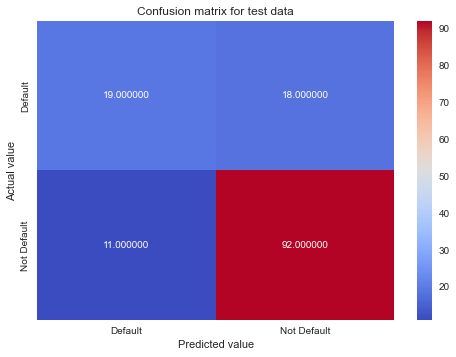

In [104]:
sns.heatmap(cm_logregg,annot=True,fmt='2f',cmap='coolwarm',xticklabels=['Default','Not Default'],yticklabels=['Default','Not Default'])
plt.xlabel('Predicted value')
plt.ylabel('Actual value')
plt.title('Confusion matrix for test data')


In [105]:
# find precision score
prec_score = metrics.precision_score(bankloans_test_predict_log.actual,bankloans_test_predict_log.predicted_value)
print('precison_score :',round(prec_score,3))

precison_score : 0.633


In [106]:
## accuracy of the model
model_accuracy = metrics.accuracy_score(bankloans_test_predict_log.actual,bankloans_test_predict_log.predicted_value)
print('model_accuracy :',round(model_accuracy,3))

model_accuracy : 0.793


In [107]:
bankloans_test_predict_log.predicted_value.value_counts()

0.0    110
1.0     30
Name: predicted_value, dtype: int64

In [108]:
bankloans_test_predict_log.actual.value_counts()

0.0    103
1.0     37
Name: actual, dtype: int64

In [109]:
print(metrics.classification_report(bankloans_test_predict_log.actual,bankloans_test_predict_log.predicted_value))


              precision    recall  f1-score   support

         0.0       0.84      0.89      0.86       103
         1.0       0.63      0.51      0.57        37

    accuracy                           0.79       140
   macro avg       0.73      0.70      0.72       140
weighted avg       0.78      0.79      0.79       140



## what we get:
we have model with overall test accuracy is arround 80 percent which is not good.In our model there are some cases where the actual value is default but it predicted as not default .one possible reason behind that our  default model assumes people with more than 0.5 probability will not default.


In [110]:
## next task is to find optimum cutoff value:
predict_proba_bankloan = log_regg.predict_proba(x_test)
predict_proba_bankloan= pd.DataFrame(predict_proba_bankloan)
predict_proba_bankloan.head()


,0,1
0,0.765842,0.234158
1,0.955830,0.044170
2,0.693630,0.306370
3,0.084526,0.915474
4,0.707041,0.292959


In [111]:
bankloans_test_predict_log = pd.concat([bankloans_test_predict_log,predict_proba_bankloan],axis=1)

In [112]:
bankloans_test_predict_log.columns = ['index','actual','predicted_value','default_0','default_1']
bankloans_test_predict_log

,index,actual,predicted_value,default_0,default_1
0,145,0.0,0.0,0.765842,0.234158
1,526,0.0,0.0,0.955830,0.044170
2,689,0.0,0.0,0.693630,0.306370
3,430,1.0,1.0,0.084526,0.915474
4,245,0.0,0.0,0.707041,0.292959
...,...,...,...,...,...
135,64,0.0,0.0,0.814437,0.185563
136,141,1.0,0.0,0.655652,0.344348
137,130,0.0,0.0,0.730703,0.269297
138,39,0.0,0.0,0.996297,0.003703


In [113]:
auc_score = metrics.roc_auc_score(bankloans_test_predict_log.actual,bankloans_test_predict_log.default_1)
auc_score

0.8732616111256889

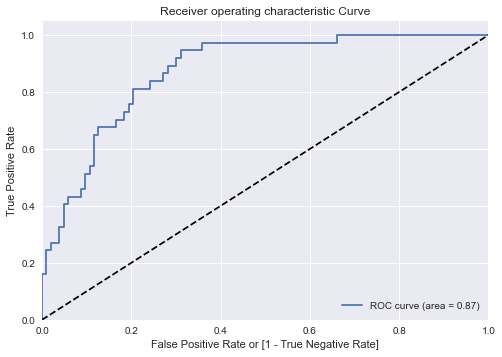

In [114]:
#Draw a roc curve

fpr, tpr, thresholds = metrics.roc_curve(bankloans_test_predict_log.actual, bankloans_test_predict_log.default_1, 
                                         drop_intermediate= False)


plt.plot(fpr, tpr , label = 'ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic Curve')
plt.legend(loc="lower right")
plt.show()

cutoff would be optimum where specificity and sensitivity would be maximum for the given cutoff

In [115]:
##TPR - Sensitivity
##1-FPR - Specificity

i = np.arange(len(tpr))

roc_like_df = pd.DataFrame({'falsepositiverate' : pd.Series(fpr, index=i),'sensitivity' : pd.Series(tpr, index = i), 
              'specificity' : pd.Series(1-fpr, index = i),'cutoff' : pd.Series(thresholds, index = i)})
roc_like_df['total'] = roc_like_df['sensitivity'] + roc_like_df['specificity']

In [116]:
roc_like_df[roc_like_df['total']==roc_like_df['total'].max()]

,falsepositiverate,sensitivity,specificity,cutoff,total
67,0.31068,0.945946,0.68932,0.204851,1.635266


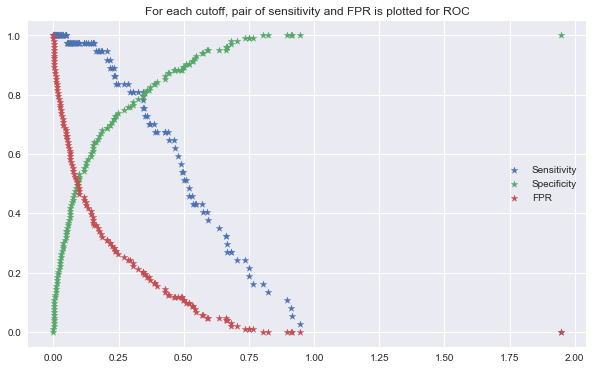

In [117]:
plt.subplots(figsize=(10,6))
plt.scatter(roc_like_df['cutoff'], roc_like_df['sensitivity'], marker='*', label='Sensitivity')
plt.scatter(roc_like_df['cutoff'], roc_like_df['specificity'], marker='*', label='Specificity')
plt.scatter(roc_like_df['cutoff'], roc_like_df['falsepositiverate'], marker='*', label='FPR')
plt.title('For each cutoff, pair of sensitivity and FPR is plotted for ROC')
plt.legend()

In [118]:
#Predicting with new cut-off probability
bankloans_test_predict_log['new_labels'] = bankloans_test_predict_log['default_1'].map( lambda x: 1 if x >= 0.224326 else 0 )

bankloans_test_predict_log.head()

,index,actual,predicted_value,default_0,default_1,new_labels
0,145,0.0,0.0,0.765842,0.234158,1
1,526,0.0,0.0,0.955830,0.044170,0
2,689,0.0,0.0,0.693630,0.306370,1
3,430,1.0,1.0,0.084526,0.915474,1
4,245,0.0,0.0,0.707041,0.292959,1


In [119]:

cm_logreg = metrics.confusion_matrix(bankloans_test_predict_log.actual,
                                    bankloans_test_predict_log.new_labels,labels = [1,0])
cm_logreg

array([[33,  4],
       [30, 73]], dtype=int64)

Text(0.5, 29.5, 'Predicted Label')

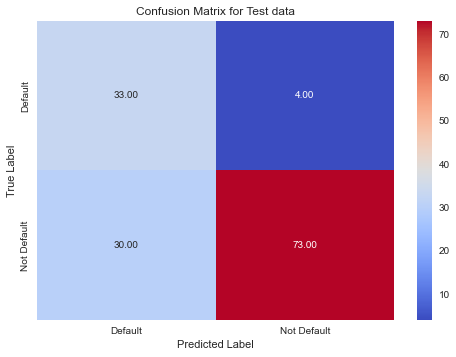

In [120]:
sns.heatmap(cm_logreg,annot=True, fmt=".2f", cmap="coolwarm",
            xticklabels = ["Default", "Not Default"] , yticklabels = ["Default", "Not Default"])
plt.title("Confusion Matrix for Test data")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")

In [121]:
print(metrics.classification_report(bankloans_test_predict_log.actual,bankloans_test_predict_log.new_labels))

              precision    recall  f1-score   support

         0.0       0.95      0.71      0.81       103
         1.0       0.52      0.89      0.66        37

    accuracy                           0.76       140
   macro avg       0.74      0.80      0.74       140
weighted avg       0.84      0.76      0.77       140



In [122]:
recall_score = metrics.recall_score(bankloans_test_predict_log.actual, bankloans_test_predict_log.new_labels)
print("recall_score:", round(recall_score , 3))

recall_score: 0.892


In [123]:
#find the overall accuracy of model

acc_score = metrics.accuracy_score(bankloans_test_predict_log.actual,bankloans_test_predict_log.new_labels)
print("Accuracy of model :", round(acc_score,3))

Accuracy of model : 0.757


eventhough our model overall accuracy decreses but recall_score: ability of the model to find all the default customers has been increased from 55% to 89%.
The drawback of changing the cutoff value can be seen in drastic drop of precision score  from 66% to 53%:
precision score: ability of model not to label non default customers as default customers 

In [124]:
# We will Predict the credit risk for remainimg 150 customers using the logistic model with cutoff as 0.224

In [125]:
#probability for new customers
new_cust_prob = pd.DataFrame(log_regg.predict_proba(bankloans_new[featurecolumns]))
new_cust_prob.columns = ["prob_default_0", "prob_default_1"]
new_cust_prob.index = bankloans_new.index

In [126]:
new_cust_prob.head()

,prob_default_0,prob_default_1
700,0.990343,0.009657
701,0.943501,0.056499
702,0.357507,0.642493
703,0.920256,0.079744
704,0.624634,0.375366


In [127]:
bankloans_new_predicted = pd.concat([bankloans_new,new_cust_prob],axis=1)
bankloans_new_predicted.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default,prob_default_0,prob_default_1
700,36,1,16,13,32,10.9,0.544128,2.943872,NaN,0.990343,0.009657
701,50,1,6,27,21,12.9,1.316574,1.392426,NaN,0.943501,0.056499
702,40,1,9,9,33,17.0,4.880700,0.729300,NaN,0.357507,0.642493
703,31,1,5,7,23,2.0,0.046000,0.414000,NaN,0.920256,0.079744
704,29,1,4,0,24,7.8,0.866736,1.005264,NaN,0.624634,0.375366


In [128]:
#using the cutoff value we will predict the default

bankloans_new_predicted['predicted_default'] = bankloans_new_predicted["prob_default_1"].apply(lambda x: 1 if x > 0.224 else 0)

In [129]:
bankloans_new_predicted.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default,prob_default_0,prob_default_1,predicted_default
700,36,1,16,13,32,10.9,0.544128,2.943872,NaN,0.990343,0.009657,0
701,50,1,6,27,21,12.9,1.316574,1.392426,NaN,0.943501,0.056499,0
702,40,1,9,9,33,17.0,4.880700,0.729300,NaN,0.357507,0.642493,1
703,31,1,5,7,23,2.0,0.046000,0.414000,NaN,0.920256,0.079744,0
704,29,1,4,0,24,7.8,0.866736,1.005264,NaN,0.624634,0.375366,1


In [130]:
#Model Prediction
bankloans_new_predicted.predicted_default.value_counts()

0    90
1    60
Name: predicted_default, dtype: int64

Text(0.5, 0, 'Default')

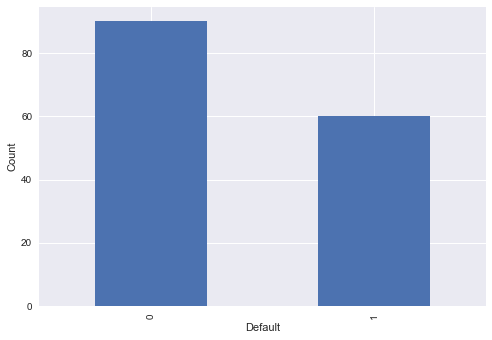

In [131]:
#Model Prediction

bankloans_new_predicted.predicted_default.value_counts().plot.bar()

plt.ylabel("Count")
plt.xlabel("Default")

## result

Out of 150 new customers, model has predicted that 85 customers are not going to default on the bank loan and remaining 65 customes would most likely default on the loan.

# Finally, let's save the  model.

In [148]:
import pickle

In [150]:
with open('model_pickel', 'wb') as f:
    pickle.dump(log_regg, f)

In [151]:
with open('model_pickel', 'rb') as f:
   mp=  pickle.load(f)

array([0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0.])